# Segformer (Nvidia)
## Training Segformer-b1

In [ ]:
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

helper_path = os.path.abspath(os.path.join('../helper'))
if helper_path not in sys.path:
    sys.path.append(helper_path)

In [1]:
from helper.models.config import *
from helper.models.nvidia_ade20k import *
from helper.data.dataobj import DrainageDataset
from torch.utils.data import DataLoader
from helper.data.dataobj import DrainageDataset
from sklearn.model_selection import train_test_split
from helper.utilities import *
from helper.callbacks.logs import save_history_callback, save_resulting_callback
from helper.callbacks.visualize import *
from transformers import logging
import numpy as np
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
logging.set_verbosity_error()

KeyboardInterrupt: 

## Setting model

In [ ]:
from torch import load

In [ ]:
device = 'cuda'
segformer_model = NvidiaSegformer(device=device)

Initialized NvidiaSegformer


In [ ]:
config_nvidia = Config(
    model=segformer_model,
    num_epochs=50,
    opt='Adam',
    lr=1e-4
)
print(config_nvidia.get_params())
config_nvidia.optimizer.load_state_dict(load('model_segformer.pth')['optimizer_state'])

{'num_epochs': 50, 'batch_size': 64, 'opt': 'Adam', 'crit': 'CrossEntropy', 'learning_rate': 0.0001}


## Dataset

In [ ]:
images = np.load('../helper/data/datasets/new_images.npy').astype(np.uint8)
masks = np.load('../helper/data/datasets/new_masks.npy')

train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

print('Getting test dataset')
bins = [get_bin(mask) for mask in masks]

train_images, test_images, train_masks, test_masks = train_test_split(images, masks, test_size=test_ratio, stratify=bins, random_state=42)

print('Getting train and val datasets')
bins = [get_bin(mask) for mask in test_masks]
train_images, val_images, train_masks, val_masks = train_test_split(train_images, train_masks, test_size=val_ratio / (train_ratio + test_ratio), random_state=42)

train_dataset = DrainageDataset(train_images, train_masks, device=device)
val_dataset = DrainageDataset(val_images, val_masks, device=device)
test_dataset = DrainageDataset(test_images, test_masks, device=device)

train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=False)

drainage_dataloader = {'train': train_dataloader, 'validate': val_dataloader}

Getting test dataset
Getting train and val datasets


## Training and testing model

### Training model

Training model NvidiaSegformer - 7 using cuda


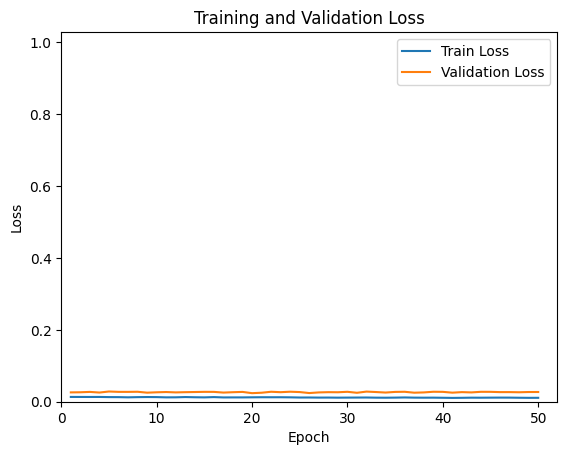

epoch:   2%|▏         | 1/50 [03:58<3:15:04, 238.87s/it]

Epoch 0: train_loss 0.013318832428116188, train_iou 0.7326071262359619,  val_loss 0.025972324173136423, val_iou 0.6662977337837219


epoch:   4%|▍         | 2/50 [07:52<3:08:31, 235.66s/it]

epoch:   6%|▌         | 3/50 [11:51<3:05:55, 237.36s/it]

Epoch 2: train_loss 0.013218703135371409, train_iou 0.7229814529418945,  val_loss 0.027315878339352145, val_iou 0.6500908136367798


epoch:   8%|▊         | 4/50 [15:49<3:02:01, 237.42s/it]

Epoch 3: train_loss 0.013280037822051331, train_iou 0.7163900136947632,  val_loss 0.02553725501983076, val_iou 0.6727471351623535


epoch:  10%|█         | 5/50 [19:41<2:56:44, 235.67s/it]

Epoch 4: train_loss 0.012873270557660245, train_iou 0.7300180196762085,  val_loss 0.028418831016507842, val_iou 0.6686257123947144


epoch:  12%|█▏        | 6/50 [23:38<2:53:01, 235.95s/it]

Epoch 5: train_loss 0.012764348081541985, train_iou 0.7339558601379395,  val_loss 0.02741963645663633, val_iou 0.670653223991394


epoch:  14%|█▍        | 7/50 [27:30<2:48:10, 234.65s/it]

Epoch 6: train_loss 0.012223095459368092, train_iou 0.73822021484375,  val_loss 0.027372573832831076, val_iou 0.6725852489471436


epoch:  16%|█▌        | 8/50 [31:20<2:43:12, 233.16s/it]

Epoch 7: train_loss 0.012763697746827547, train_iou 0.7339932322502136,  val_loss 0.027695380031101165, val_iou 0.6667715311050415


epoch:  18%|█▊        | 9/50 [35:10<2:38:36, 232.12s/it]

Epoch 8: train_loss 0.013049436945574804, train_iou 0.7335200309753418,  val_loss 0.025179476557319523, val_iou 0.6716665029525757


epoch:  20%|██        | 10/50 [39:00<2:34:18, 231.46s/it]

Epoch 9: train_loss 0.012851820004357634, train_iou 0.7308399081230164,  val_loss 0.0262578859604815, val_iou 0.680679976940155


epoch:  22%|██▏       | 11/50 [42:49<2:30:07, 230.95s/it]

Epoch 10: train_loss 0.012135726871966112, train_iou 0.7450915575027466,  val_loss 0.02697121961823394, val_iou 0.6682246923446655


epoch:  24%|██▍       | 12/50 [46:39<2:26:02, 230.60s/it]

Epoch 11: train_loss 0.012245031821883287, train_iou 0.7466854453086853,  val_loss 0.02594903049369653, val_iou 0.6723129749298096


epoch:  26%|██▌       | 13/50 [50:29<2:22:06, 230.44s/it]

Epoch 12: train_loss 0.012994780111117194, train_iou 0.7281546592712402,  val_loss 0.026573495228364264, val_iou 0.6573504209518433


epoch:  28%|██▊       | 14/50 [54:19<2:18:07, 230.20s/it]

Epoch 13: train_loss 0.012431233540578724, train_iou 0.7364349365234375,  val_loss 0.026979175065794298, val_iou 0.6782944202423096


epoch:  30%|███       | 15/50 [58:09<2:14:18, 230.24s/it]

Epoch 14: train_loss 0.01208337199958888, train_iou 0.7409807443618774,  val_loss 0.02746635229797453, val_iou 0.669402003288269


epoch:  32%|███▏      | 16/50 [1:04:06<2:32:06, 268.44s/it]

Epoch 15: train_loss 0.01289682074603609, train_iou 0.735365092754364,  val_loss 0.027383317499952292, val_iou 0.6771883964538574


epoch:  34%|███▍      | 17/50 [1:11:33<2:57:11, 322.18s/it]

Epoch 16: train_loss 0.01191967695023275, train_iou 0.7440997958183289,  val_loss 0.02543606096377937, val_iou 0.6780136823654175


epoch:  36%|███▌      | 18/50 [1:19:00<3:11:48, 359.63s/it]

Epoch 17: train_loss 0.012016889099219833, train_iou 0.7442846298217773,  val_loss 0.026476630790820046, val_iou 0.6729950308799744


epoch:  38%|███▊      | 19/50 [1:26:27<3:19:22, 385.90s/it]

Epoch 18: train_loss 0.012007072425575971, train_iou 0.7453274726867676,  val_loss 0.027289386768574998, val_iou 0.6533372402191162


epoch:  40%|████      | 20/50 [1:33:17<3:16:28, 392.97s/it]

Epoch 19: train_loss 0.012264933187502, train_iou 0.7372233867645264,  val_loss 0.0238195349492373, val_iou 0.6769830584526062


epoch:  42%|████▏     | 21/50 [1:39:55<3:10:42, 394.56s/it]

Epoch 20: train_loss 0.01248352824167822, train_iou 0.7402929067611694,  val_loss 0.025013833416886226, val_iou 0.6876393556594849


epoch:  44%|████▍     | 22/50 [2:18:24<7:32:12, 969.01s/it]

Epoch 21: train_loss 0.012425260619583354, train_iou 0.7273075580596924,  val_loss 0.027711776275468128, val_iou 0.6683099269866943


epoch:  46%|████▌     | 23/50 [2:22:30<5:38:24, 752.04s/it]

Epoch 22: train_loss 0.012463505553577083, train_iou 0.736357569694519,  val_loss 0.026537984399305235, val_iou 0.6709730625152588


epoch:  48%|████▊     | 24/50 [2:26:35<4:20:03, 600.14s/it]

Epoch 23: train_loss 0.012211589371591103, train_iou 0.7219820022583008,  val_loss 0.02783029521464981, val_iou 0.6679462194442749


epoch:  50%|█████     | 25/50 [2:30:41<3:25:45, 493.82s/it]

Epoch 24: train_loss 0.011692470012339277, train_iou 0.749017596244812,  val_loss 0.02686539509644111, val_iou 0.6705895662307739


epoch:  52%|█████▏    | 26/50 [2:36:52<3:02:44, 456.86s/it]

Epoch 25: train_loss 0.011740241190951682, train_iou 0.7538877725601196,  val_loss 0.024105905705401973, val_iou 0.6818135976791382


epoch:  54%|█████▍    | 27/50 [2:44:13<2:53:19, 452.15s/it]

Epoch 26: train_loss 0.011477050928380151, train_iou 0.7580040693283081,  val_loss 0.025900414764320336, val_iou 0.6793574094772339


epoch:  56%|█████▌    | 28/50 [2:51:23<2:43:23, 445.60s/it]

Epoch 27: train_loss 0.01155492169061293, train_iou 0.7472383975982666,  val_loss 0.026579505984260832, val_iou 0.6654897928237915


epoch:  58%|█████▊    | 29/50 [2:58:31<2:34:02, 440.13s/it]

Epoch 28: train_loss 0.011292253017287564, train_iou 0.7552691698074341,  val_loss 0.02635388867428867, val_iou 0.6867591738700867


epoch:  60%|██████    | 30/50 [3:05:36<2:25:15, 435.75s/it]

Epoch 29: train_loss 0.011452451400672045, train_iou 0.7566987872123718,  val_loss 0.027592586453563425, val_iou 0.6638920903205872


epoch:  62%|██████▏   | 31/50 [3:12:40<2:16:52, 432.25s/it]

Epoch 30: train_loss 0.01158951264225975, train_iou 0.7576804161071777,  val_loss 0.02487451177571089, val_iou 0.6850587725639343


epoch:  64%|██████▍   | 32/50 [3:19:43<2:08:51, 429.50s/it]

Epoch 31: train_loss 0.011723895187831486, train_iou 0.7572471499443054,  val_loss 0.028180318874537303, val_iou 0.6755436658859253


epoch:  66%|██████▌   | 33/50 [3:26:47<2:01:10, 427.67s/it]

Epoch 32: train_loss 0.011286464209357897, train_iou 0.7656128406524658,  val_loss 0.026942035083168295, val_iou 0.6799480319023132


epoch:  68%|██████▊   | 34/50 [3:33:49<1:53:35, 425.97s/it]

Epoch 33: train_loss 0.01115236283163932, train_iou 0.7599409818649292,  val_loss 0.02553367462529931, val_iou 0.688117265701294


epoch:  70%|███████   | 35/50 [3:40:51<1:46:12, 424.87s/it]

Epoch 34: train_loss 0.011406201662288772, train_iou 0.7585720419883728,  val_loss 0.02728979877366494, val_iou 0.6805986166000366


epoch:  72%|███████▏  | 36/50 [3:47:54<1:38:58, 424.20s/it]

Epoch 35: train_loss 0.011883859079243358, train_iou 0.7527348399162292,  val_loss 0.027659565831224125, val_iou 0.6913859248161316


epoch:  74%|███████▍  | 37/50 [3:54:57<1:31:51, 423.96s/it]

Epoch 36: train_loss 0.011373178513488584, train_iou 0.7616626024246216,  val_loss 0.025109149515628815, val_iou 0.684707522392273


epoch:  76%|███████▌  | 38/50 [4:01:59<1:24:41, 423.42s/it]

Epoch 37: train_loss 0.01122709066930042, train_iou 0.7599748969078064,  val_loss 0.02587205806486709, val_iou 0.6803550720214844


epoch:  78%|███████▊  | 39/50 [4:09:02<1:17:34, 423.11s/it]

Epoch 38: train_loss 0.011323732061167357, train_iou 0.7539131045341492,  val_loss 0.02770705454011438, val_iou 0.670379638671875


epoch:  80%|████████  | 40/50 [4:16:10<1:10:45, 424.56s/it]

Epoch 39: train_loss 0.01098146605233251, train_iou 0.7692276239395142,  val_loss 0.027458481039972074, val_iou 0.6824098825454712


epoch:  82%|████████▏ | 41/50 [4:23:17<1:03:48, 425.34s/it]

Epoch 40: train_loss 0.010622171809275945, train_iou 0.7735275030136108,  val_loss 0.025201546999635876, val_iou 0.6952826976776123


epoch:  84%|████████▍ | 42/50 [4:30:26<56:51, 426.46s/it]  

Epoch 41: train_loss 0.01087702840271873, train_iou 0.7654706835746765,  val_loss 0.02670751716340742, val_iou 0.6699552536010742


epoch:  86%|████████▌ | 43/50 [4:37:33<49:46, 426.63s/it]

Epoch 42: train_loss 0.011264743377463986, train_iou 0.758840799331665,  val_loss 0.02590958974374238, val_iou 0.6678030490875244


epoch:  88%|████████▊ | 44/50 [4:44:41<42:41, 426.99s/it]

Epoch 43: train_loss 0.011171099335356593, train_iou 0.7616713047027588,  val_loss 0.027571763372629562, val_iou 0.6766372919082642


epoch:  90%|█████████ | 45/50 [4:51:50<35:38, 427.63s/it]

Epoch 44: train_loss 0.0113393465263976, train_iou 0.7571752071380615,  val_loss 0.027495148431469676, val_iou 0.6794754862785339


epoch:  92%|█████████▏| 46/50 [4:58:54<28:26, 426.57s/it]

Epoch 45: train_loss 0.011459506462368901, train_iou 0.7531591653823853,  val_loss 0.026730235205382428, val_iou 0.6764646768569946


epoch:  94%|█████████▍| 47/50 [5:05:51<21:11, 423.82s/it]

Epoch 46: train_loss 0.01140225536020642, train_iou 0.7595903873443604,  val_loss 0.02676081520214837, val_iou 0.6908211708068848


epoch:  96%|█████████▌| 48/50 [5:12:49<14:03, 421.85s/it]

Epoch 47: train_loss 0.011051340693426052, train_iou 0.7625624537467957,  val_loss 0.026328308297501456, val_iou 0.694499671459198


epoch:  98%|█████████▊| 49/50 [5:19:45<07:00, 420.32s/it]

Epoch 48: train_loss 0.010807784194572003, train_iou 0.7711302638053894,  val_loss 0.026989607180478752, val_iou 0.689032256603241


epoch: 100%|██████████| 50/50 [5:26:44<00:00, 419.79s/it]

Epoch 49: train_loss 0.010866588347212032, train_iou 0.7657386064529419,  val_loss 0.02705047694185088, val_iou 0.6867944002151489


epoch: 100%|██████████| 50/50 [5:26:44<00:00, 392.09s/it]


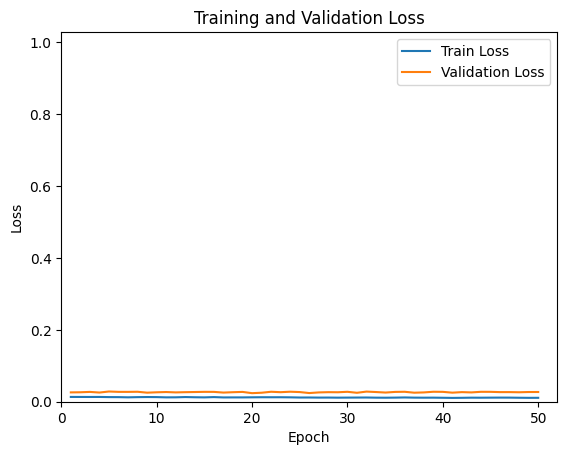

In [6]:
history = segformer_model.train(drainage_dataloader, config_nvidia, device)

### Saving training callbacks

In [7]:
segformer_model.save()
print('Saved model')
save_history_callback(segformer_model, history=history, hyperparams=config_nvidia.get_params())
print('Saved train history')

Saved model
Saved train history


In [9]:
from torch import save
savemod = {
    'epoch': config_nvidia.NUM_EPOCHS,
    'model_state': segformer_model.model.state_dict(),
    'optimizer_state': config_nvidia.optimizer.state_dict(),
}
save(savemod, 'model_segformer.pth')